
### Advanced Machine Learning

# Linear models for Regression and Classification

15/03/21

Jonathan Schler

(credit: Columbia Univ - 4995 - Machine Learning Course)




# Linear Models




# Linear Models for Regression

<center>
<img src="./images/linear_regression_1d.png" style="width: 600px;">
</center>

$$\hat{y} = w^T \mathbf{x} + b = \sum_{i=1}^p w_i x_i +b$$



# Ordinary Least Squares

$$\hat{y} = w^T \mathbf{x} + b = \sum_{i=1}^p w_i x_i +b $$

$$\min_{w \in \mathbb{R}^p, b\in\mathbb{R}} \sum_{i=1}^n (w^T\mathbf{x}_i + b - y_i)^2$$

Unique solution if $\mathbf{X} = (\mathbf{x}_1, ... \mathbf{x}_n)^T$ has full column rank.


# Ridge Regression

$$ \min_{w \in \mathbb{R}^p, b\in\mathbb{R}} \sum_{i=1}^n (w^T\mathbf{x}_i + b - y_i)^2 + \alpha ||w||^2 $$

Always has a unique solution.

Tuning parameter alpha.



# (regularized) Empirical Risk Minimization

$$ min_{f \in F} \sum_{i=1}^n L(f(\mathbf{x}_i), y_i) + \alpha R(f) $$



# Reminder on model complexity

<center>
<img src="images/overfitting_underfitting_cartoon_full.png" style="width: 600px;">
</center>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston

boston = load_boston()
X, y = boston.data, boston.target

(506, 13)
(506,)


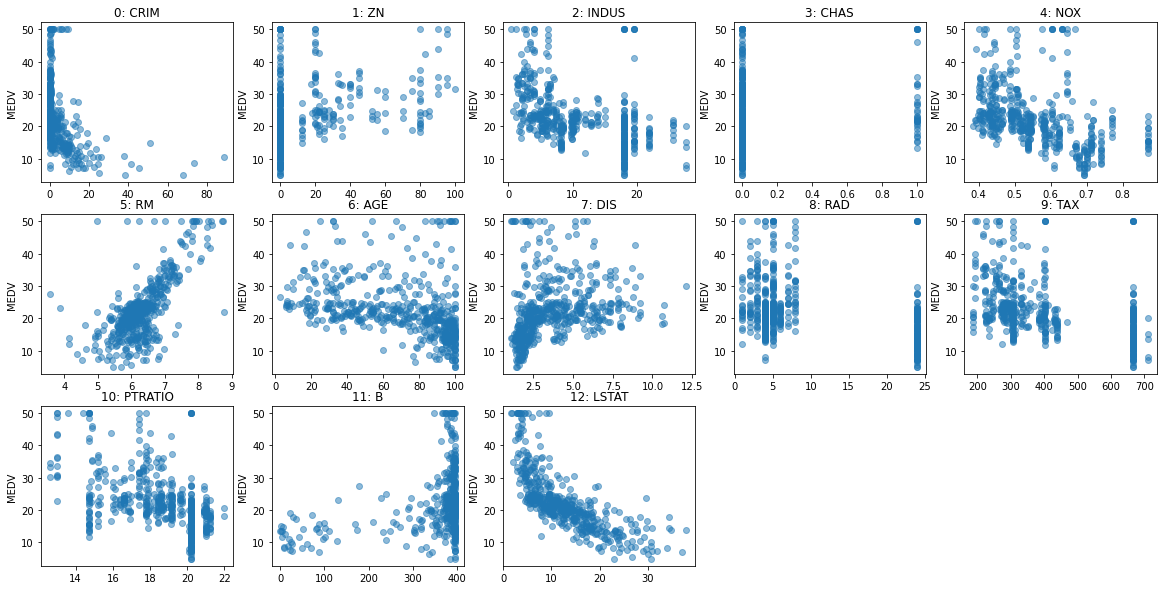

In [3]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")
    
print(X.shape)
print(y.shape)


#  Scores - Coefficient of determination R^2

$$ R^2(y, \hat{y}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \hat{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2} $$

$$ \bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i$$

Can be negative for biased estimators - or the test set!


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
print(np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10)))
print(np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10)))


from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 13)}
#print(param_grid)
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True, iid=False)
grid.fit(X_train, y_train);

0.7171866313426761
0.7152734545900474


/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


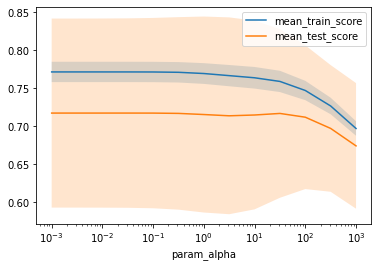

In [8]:

results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")

In [9]:
from sklearn.preprocessing import PolynomialFeatures, scale
from sklearn.impute import SimpleImputer
X, y = boston.data, boston.target
#X, y = data.data, data.target
X_poly = PolynomialFeatures(include_bias=False).fit_transform(SimpleImputer().fit_transform(scale(X)))
print(X_poly.shape)
X_train, X_test, y_train,  y_test = train_test_split(X_poly, y, random_state=42)

(506, 104)


here we added some polynomial noise

/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


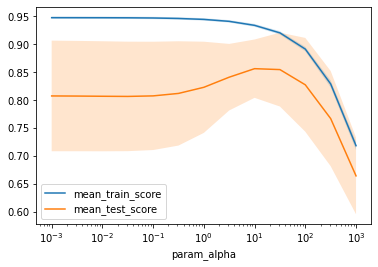

In [10]:
param_grid = {'alpha': np.logspace(-3, 3, 13)}

grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True, iid=False)
grid.fit(X_train, y_train)

results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")


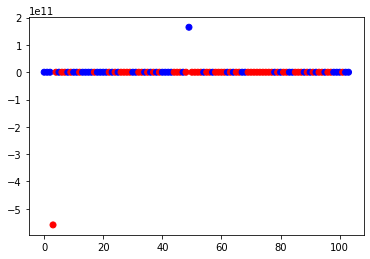

In [13]:
lr = LinearRegression().fit(X_train, y_train)
plt.scatter(range(X_train.shape[1]), lr.coef_, c=np.sign(lr.coef_), cmap="bwr_r")
#plt.ylim((-1,1))

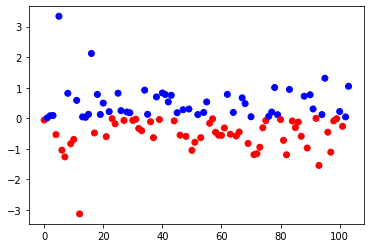

In [14]:
ridge = grid.best_estimator_
plt.scatter(range(X_train.shape[1]), ridge.coef_, c=np.sign(ridge.coef_), cmap="bwr_r")


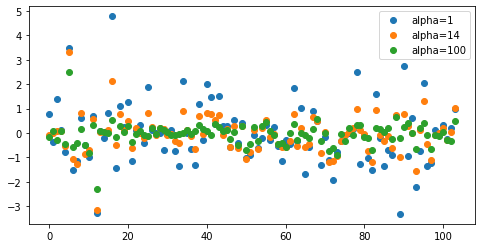

In [15]:
ridge100 = Ridge(alpha=100).fit(X_train, y_train)
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
plt.figure(figsize=(8, 4))

plt.plot(ridge1.coef_, 'o', label="alpha=1")
plt.plot(ridge.coef_, 'o', label="alpha=14")
plt.plot(ridge100.coef_, 'o', label="alpha=100")
plt.legend()

#  Learning Curves

<center>
<img src="images/ridge_learning_curve1.png" style="width: 1200px;">
</center>


# Lasso Regression

$$ \min_{w \in \mathbb{R}^p, b\in\mathbb{R}} \sum_{i=1}^n (w^T\mathbf{x}_i + b - y_i)^2 + \alpha ||w||_1 $$

- Shrinks w towards zero like Ridge

- Sets some w exactly to zero - automatic feature selection!




# Understanding L1 and L2 Penalties

<left>
<img src="images/l2_l1_l0.png" style="width: 600px;">
</left>

$$ \ell_2(w) = \sqrt{\sum_i w_i ^ 2}$$
$$ \ell_1(w) = \sum_i |w_i|$$
$$ \ell_0(w) = \sum_i 1_{w_i != 0}$$

In [16]:
param_grid = {'alpha': np.logspace(-3, 0, 13)}
#print(param_grid)

grid = GridSearchCV(Lasso(normalize=True), param_grid, cv=10,return_train_score=True)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)





/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.84050949901075, tolerance: 3.107898064516129
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4412178933403084, tolerance: 2.9370749032258066
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.178481361634795, tolerance: 2.9869597595307917
  positive)


{'alpha': 0.0031622776601683794}
0.8536652758001477


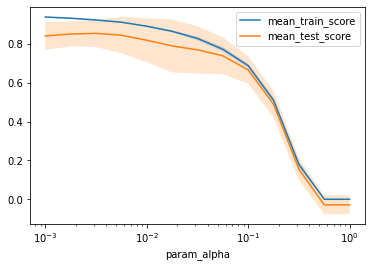

In [17]:
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")

(506, 104)


49

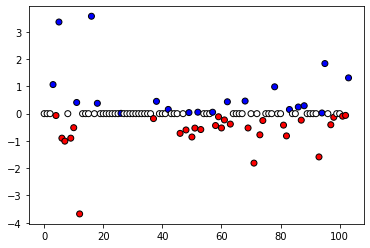

In [18]:
lasso = grid.best_estimator_
plt.scatter(range(X_poly.shape[1]), lasso.coef_, c=np.sign(lasso.coef_), cmap="bwr_r", edgecolor='k')
#plt.ylim((-2,2))

print(X_poly.shape)
np.sum(lasso.coef_ != 0)


# Elastic Net

- Combines benefits of Ridge and Lasso

- two parameters to tune.


$$\min_{w \in \mathbb{R}^p, b\in\mathbb{R}} \sum_{i=1}^n ||w^T\mathbf{x}_i + b - y_i||^2 + \alpha_1 ||w||_1 +  \alpha_2 ||w||^2_2 $$



# Parametrization in scikit-learn
$$\min_{w \in \mathbb{R}^p, b\in\mathbb{R}} \sum_{i=1}^n (w^T\mathbf{x}_i + b - y_i)^2 + \alpha \eta ||w||_1 +  \alpha (1 - \eta) ||w||^2_2 $$

Where $\eta$ is the relative amount of l1 penalty (`l1_ratio` in the code).

In [19]:
from sklearn.linear_model import ElasticNet
param_grid = {'alpha': np.logspace(-4, -1, 10),
              'l1_ratio': [0.01, .1, .5, .9, .98, 1]}
grid = GridSearchCV(ElasticNet(), param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 812.5644595657542, tolerance: 3.055030340175953
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 758.0957217798848, tolerance: 3.0102712140762464
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 798.2173168072392, tolerance: 2.918906580645161
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordina

/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 751.4942041840252, tolerance: 3.0102712140762464
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 789.9122887173166, tolerance: 2.918906580645161
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 824.0069976142995, tolerance: 3.107898064516129
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordina

/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 784.087712464982, tolerance: 3.0810269970760236
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 819.3484826055029, tolerance: 3.055030340175953
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765.8219511326455, tolerance: 3.0102712140762464
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordina

/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 850.1234647528714, tolerance: 3.1041314076246334
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 828.5696157672676, tolerance: 3.109025061583578
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 789.4715407691788, tolerance: 3.0810269970760236
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordin

/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 796.6674328872142, tolerance: 2.9869597595307917
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 820.9356365987024, tolerance: 2.9298605395894426
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 842.3281771909438, tolerance: 3.1041314076246334
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordi

/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 828.615898228926, tolerance: 3.107898064516129
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 742.1213836157478, tolerance: 2.9370749032258066
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.9881058144641, tolerance: 2.9869597595307917
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordina

/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 775.1495721425842, tolerance: 2.918906580645161
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 808.2527064647933, tolerance: 3.107898064516129
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 693.2524500323836, tolerance: 2.9370749032258066
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordina

/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 711.1916821952865, tolerance: 3.055030340175953
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 761.4720282425064, tolerance: 3.0102712140762464
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 777.8113571171547, tolerance: 2.918906580645161
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordina

/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 747.990000101051, tolerance: 3.0810269970760236
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 654.6349598614231, tolerance: 3.055030340175953
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 734.3477181985478, tolerance: 3.0102712140762464
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordina

/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397.0155100227123, tolerance: 2.918906580645161
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 535.3943241824907, tolerance: 3.107898064516129
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 217.2416530015323, tolerance: 2.9370749032258066
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordina

/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 651.8110170603977, tolerance: 3.0102712140762464
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221.9479078336633, tolerance: 2.918906580645161
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 455.7348538762318, tolerance: 3.107898064516129
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordina

/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202.8312212955924, tolerance: 3.055030340175953
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.705552371147633, tolerance: 3.0102712140762464
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54.78272142975948, tolerance: 2.918906580645161
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordin

/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.713280720040757, tolerance: 2.918906580645161
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.432866440401995, tolerance: 3.107898064516129
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.250023665239496, tolerance: 2.9370749032258066
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coord

/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.539326144493316, tolerance: 3.1041314076246334
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.28131721478303, tolerance: 3.109025061583578
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3127033597704667, tolerance: 3.055030340175953
  positive)
/Users/jonathan.schler/anaconda3/envs/python37/lib/python3.7/site-packages/sklearn/linear_model/_coordin

{'alpha': 0.046415888336127774, 'l1_ratio': 0.1}
0.8587392730776561


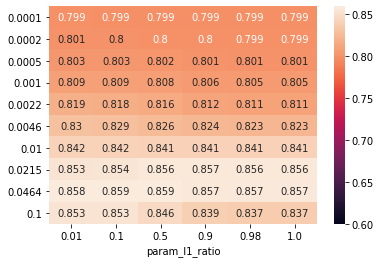

In [22]:
import seaborn as sns

res = pd.pivot_table(pd.DataFrame(grid.cv_results_),
    values='mean_test_score', index='param_alpha', columns='param_l1_ratio')
res = res.set_index(res.index.values.round(4))
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)
#res

#pd.DataFrame(grid.cv_results_)




# Questions ?

    